In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_mnist import *
from experiment_constant import *
from experiment_random import *
from scipy.special import expit
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [78]:
x_train = np.random.randn(5, 100)
y_train = np.sum(x_train, axis = 1) / 10

In [79]:
y_train

array([ 0.25129186,  0.64305459,  0.92453941, -0.01552729,  1.11167359])

In [184]:
model = Sequential()
model.add(Dense(20, input_shape = (100, ),
                    kernel_initializer = Constant(np.random.randn(3, 20) * np.sqrt(2. / 3)),
                    activation = get_custom_activation(1, 'sigmoid'),
                    bias_initializer = 'random_normal'))
model.add(Dense(20, input_shape = (20, ),
                    kernel_initializer = Constant(np.random.randn(20,20) * np.sqrt(2. / 20)),
                    activation = get_custom_activation(1, 'sigmoid'),
                    bias_initializer = 'random_normal'))
model.add(Dense(1, kernel_initializer = Constant(np.random.randn(20, 1) * np.sqrt(2. / 20)),
                    activation = 'linear',
                    bias_initializer = 'random_normal'))
model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.SGD(),
              metrics=['mean_absolute_error'])

In [185]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 500, verbose = False)

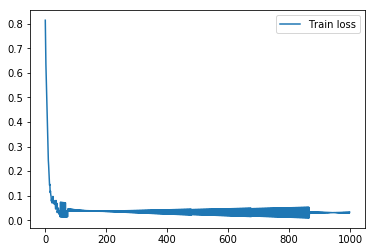

In [186]:
plt.figure()
plt.plot(history.history['loss'], label = 'Train loss')
plt.legend()
plt.show()

In [187]:
W = model.get_weights()[0::2]
B = model.get_weights()[1::2]

In [188]:
np.linalg.norm(W[1])

6.622474

In [209]:
ps = np.linspace(0.01,0.02,5)

In [210]:
p = np.mean(ps)
exp = ConstantExperiment([3, 5, 5, 1], [p, 0], 1, W, B, 'sigmoid', do_print = False)
#exp.get_exact_std_error_v3_better(x_train[0])
print(p)

0.015


In [214]:
np.mean([exp.get_exact_error_v3(x) for x in x_train])

-0.0012726574196346824

In [215]:
res = []
for p in ps:
    exp = ConstantExperiment([3, 5, 5, 1], [p, 0], 1, W, B, 'sigmoid', do_print = False)
    err = np.mean([np.mean(exp.get_error(x, repetitions = 100000) - exp.get_exact_error_v3(x)) for x in tqdm(x_train)])
    res += [err]
    K.clear_session()


100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.45it/s]

KeyboardInterrupt: 

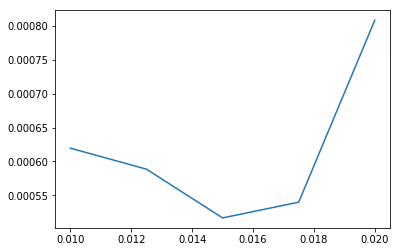

In [213]:
plt.plot(ps, np.abs(res))

/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


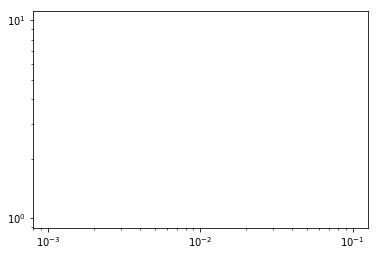

In [193]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(ps, res)
plt.show()

100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


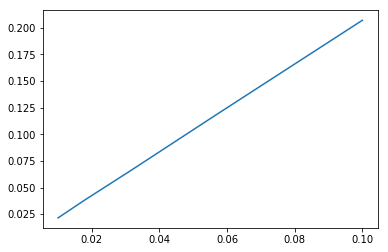

In [59]:
res = []
x = np.random.randn(100) + 0.1
for p in tqdm(ps):
    exp = ConstantExperiment([3, 5, 5, 1], [p, 0], 1, W, B, 'sigmoid', do_print = False)
    err = np.mean(exp.get_error(x, repetitions = 100000))
    res += [err]
    K.clear_session()
plt.plot(ps, res)

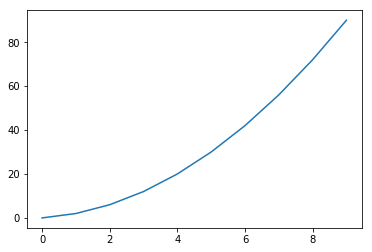

In [203]:
plt.plot([x+x**2 for x in range(10)])